In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.sparse import diags,eye
from scipy.sparse.linalg import spsolve
from scipy.optimize import root, root_scalar
from src.BloodVesselPeriodic import Grid1D, BloodVessel1Dperiodic

## 0. Grid
Esta parte deberia estar bien

In [2]:
L = 1.0
Np = 5
stretch = 1.1  # Equidistant grid

grid = Grid1D(L, Np, stretch, stretch_type='test')

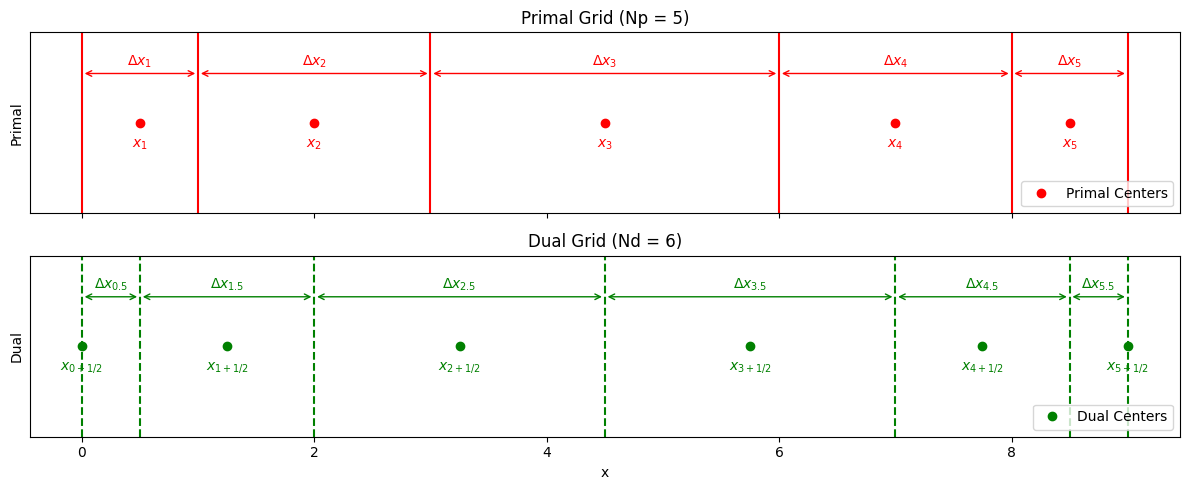

In [3]:
fig, axs = plt.subplots(2, 1, figsize=(12, 5), sharex=True)

# PRIMAL GRID
axs[0].set_title(f"Primal Grid (Np = {Np})")
for x in grid.x_faces:
    axs[0].axvline(x, color='red')
axs[0].plot(grid.x_centers, np.zeros_like(grid.x_centers), 'ro', label='Primal Centers')
axs[0].set_yticks([])
axs[0].set_ylabel("Primal")

for i, xc in enumerate(grid.x_centers, start=1):
    axs[0].text(xc, -0.015, f"$x_{{{i}}}$", color='red', ha='center')

arrow_y = 0.03
for i in range(Np):
    start = grid.x_faces[i]
    end = grid.x_faces[i + 1]
    axs[0].annotate('', xy=(end, arrow_y), xytext=(start, arrow_y),
                    arrowprops=dict(arrowstyle='<->', color='red'))
    mid = 0.5 * (start + end)
    axs[0].text(mid, arrow_y + 0.005, f"$\Delta x_{{{i+1}}}$", color='red', ha='center')

axs[0].legend(loc='lower right')

# DUAL GRID
axs[1].set_title(f"Dual Grid (Nd = {Np + 1})")
for x in grid.x_dual_edges:
    axs[1].axvline(x, color='green', linestyle='--')
axs[1].plot(grid.x_dual_centers, np.zeros_like(grid.x_dual_centers), 'go', label='Dual Centers')
axs[1].set_yticks([])
axs[1].set_xlabel("x")
axs[1].set_ylabel("Dual")

for j, xd in enumerate(grid.x_dual_centers):
    i_label = j + 1
    axs[1].text(xd, -0.015, f"$x_{{{i_label-1}+1/2}}$", color='green', ha='center')

for i in range(len(grid.x_dual_edges) - 1):
    start = grid.x_dual_edges[i]
    end = grid.x_dual_edges[i + 1]
    axs[1].annotate('', xy=(end, arrow_y), xytext=(start, arrow_y),
                    arrowprops=dict(arrowstyle='<->', color='green'))
    mid = 0.5 * (start + end)
    i_label = i + 0.5
    axs[1].text(mid, arrow_y + 0.005, f"$\Delta x_{{{i_label}}}$", color='green', ha='center')

axs[1].legend(loc='lower right')
plt.tight_layout()
plt.show()

## 3rd test: Stationary Test (from paper)

$A(x,t) = \frac{1}{sin(2\pi x)+u_c}$

$q(x,t) = 1$

$p(x,t) = p_e + K \sqrt{\frac{A}{A_0}} + \frac{ \Tau }{A_0\sqrt{A}} \frac{\partial A}{\partial t} =  K \left( \sqrt{\frac{A}{A_0}} -1 \right) $

$\tilde{s} = - \frac{\pi K \cos{\left(2 \pi x \right)}}{\sqrt{A_{0}} \rho \left(u_{c} + \sin{\left(2 \pi x \right)}\right)^{5/2}}+ 2 \pi \alpha \cos{\left(2 \pi x \right)}$

$\tilde{s}_{conv} = 2 \pi \alpha \cos{\left(2 \pi x \right)}$

$\tilde{s}_{diff} = 0 $

$\tilde{s}_{press} = - \frac{\pi K \cos{\left(2 \pi x \right)}}{\sqrt{A_{0}} \rho \left(u_{c} + \sin{\left(2 \pi x \right)}\right)^{5/2}}$

In [4]:
import sympy as sp

x, t, rho, A0, K, uc, alpha = sp.symbols(r'x t \rho A_0 K u_c \alpha')
A = (sp.sin(2 * sp.pi * x)+uc) **-1
P = K * (sp.sqrt(A)/sp.sqrt(A0) -1 )
u = 1 / A

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
L = 1.0
A0ref = 3.1416e-4
Kref = 80
pe = 0
rho = 1050
tF = 0.12
dt = 1e-4

grid = Grid1D(L=1.0, Np=31, stretch_factor=1, stretch_type='uniform')

blood_solution = BloodVessel1Dperiodic(grid = grid, flux_type='kolgan', tF = tF, dt =dt, rho=rho, Tau=0.0, A0=A0ref, K = Kref, BC_type = "test_stationary")
q_solutions, A_solutions, p_solutions, q_star_solutions, q_starstar_solutions, u_solutions, t_sol = blood_solution.solve_blood_vessel()


Forcing terms do not match expected values. Check implementation.
0.01074934395878735
0.0019353665489714733
0.0  /  0.12  dt:  0.0001  q_max:  1.0000079598942802  A_max:  0.3330016136065977  p_max:  2524.5800626799823
0.0001  /  0.12  dt:  0.0001  q_max:  1.0000159089354201  A_max:  0.33300160199954615  p_max:  2524.580017287567
0.0002  /  0.12  dt:  0.0001  q_max:  1.000023846946391  A_max:  0.3330015826596579  p_max:  2524.5799416538657
0.00030000000000000003  /  0.12  dt:  0.0001  q_max:  1.0000317737513789  A_max:  0.33300155559150546  p_max:  2524.5798357967587
0.0004  /  0.12  dt:  0.0001  q_max:  1.0000396891757732  A_max:  0.33300152079977086  p_max:  2524.5796997345524
0.0005  /  0.12  dt:  0.0001  q_max:  1.0000475930461543  A_max:  0.3330014782892454  p_max:  2524.57953348598
0.0006000000000000001  /  0.12  dt:  0.0001  q_max:  1.0000554851902796  A_max:  0.33300142806482963  p_max:  2524.5793370701995
0.0007000000000000001  /  0.12  dt:  0.0001  q_max:  1.0000633654370725  

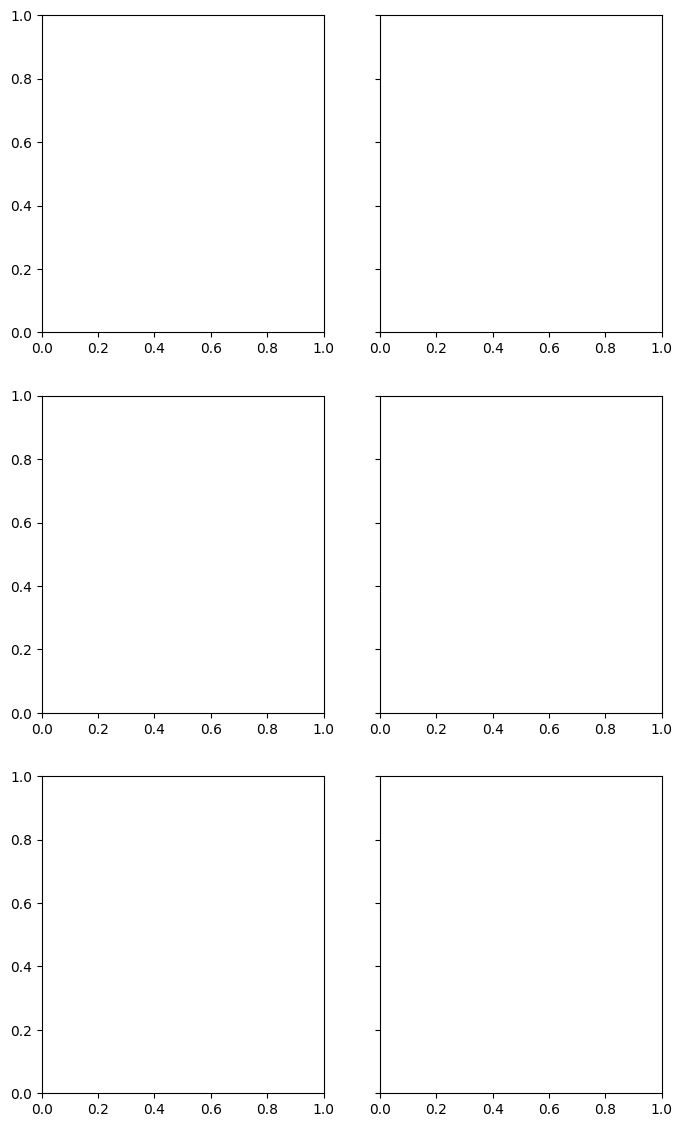

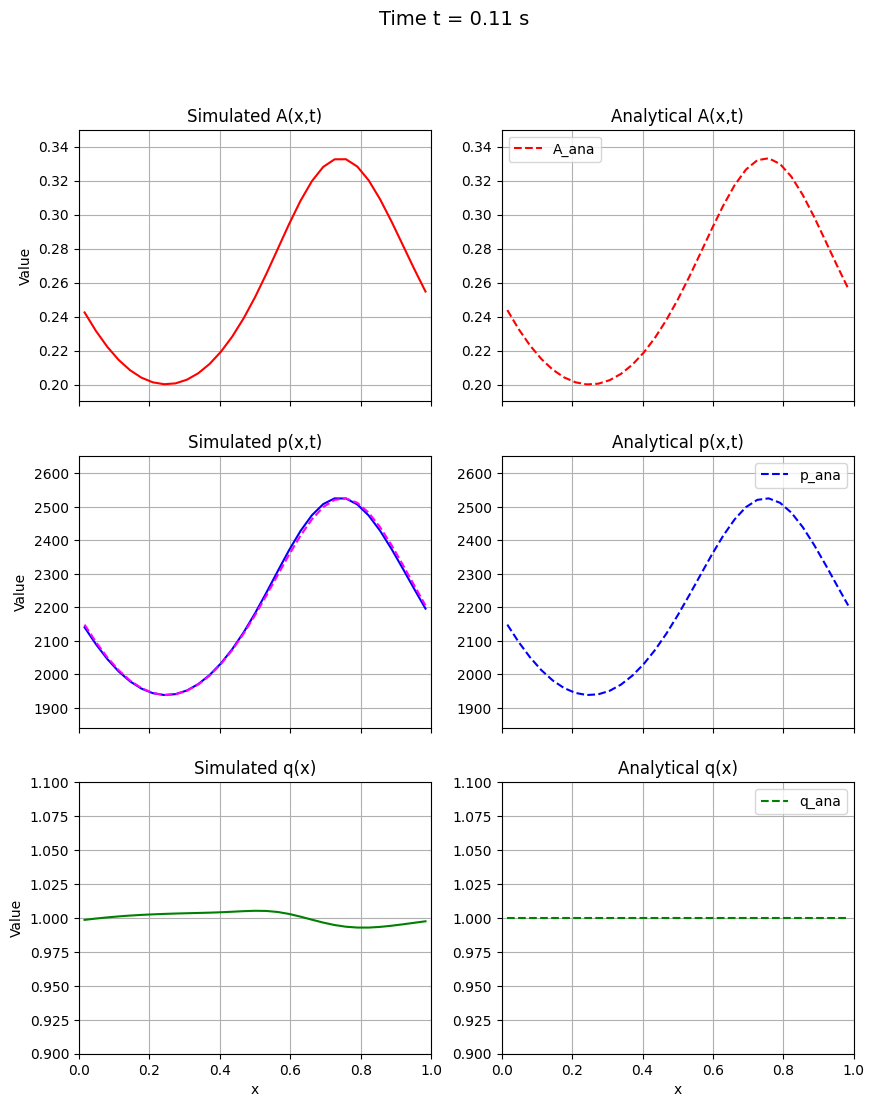

In [6]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

A_solutions = np.array(A_solutions)
p_solutions = np.array(p_solutions)
q_solutions = np.array(q_solutions)
# Constants and data
n_timesteps = len(A_solutions)
x = blood_solution.xc

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(8, 14), sharey=True)
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharex=True)
(ax_A_sim, ax_A_ana,
 ax_p_sim, ax_p_ana,
 ax_q_sim, ax_q_ana) = axes.flatten()

# Initialize plot lines
line_A_sim, = ax_A_sim.plot([], [], color='red', label='A_sim')
line_A_ana, = ax_A_ana.plot([], [], '--', color='red', label='A_ana')

line_p_sim, = ax_p_sim.plot([], [], color='blue', label='p_sim')
line_p_ana, = ax_p_ana.plot([], [], '--', color='blue', label='p_ana')
line_p_ana2, = ax_p_sim.plot([], [], '--', color='magenta', label='p_ana')


line_q_sim, = ax_q_sim.plot([], [], color='green', label='q_sim')
line_q_ana, = ax_q_ana.plot([], [], '--', color='green', label='q_ana')

ax_A_sim.set_title("Simulated A(x,t)"); ax_A_ana.set_title("Analytical A(x,t)")
ax_p_sim.set_title("Simulated p(x,t)"); ax_p_ana.set_title("Analytical p(x,t)")
ax_q_sim.set_title("Simulated q(x)");   ax_q_ana.set_title("Analytical q(x)")

for ax in axes[:, 0]:
    ax.set_ylabel("Value")
for ax in axes[-1]:
    ax.set_xlabel("x")

for ax in axes.flatten():
    ax.set_xlim(0, 1)
    ax.grid(True)

# Legends
ax_A_ana.legend()
ax_p_ana.legend()
ax_q_ana.legend()

t_max = (n_timesteps - 1) * dt

A_min, A_max = 1/5, 1/3
ax_A_sim.set_ylim(A_min * 0.95, A_max * 1.05)
ax_A_ana.set_ylim(A_min * 0.95, A_max * 1.05)

# p = pe + K * sqrt(A/A0) --> plug in min/max A
p_min = pe + Kref * (np.sqrt(A_min / A0ref)-1)
p_max = pe + Kref * (np.sqrt(A_max / A0ref)-1)
ax_p_sim.set_ylim(p_min * 0.95, p_max * 1.05)
ax_p_ana.set_ylim(p_min * 0.95, p_max * 1.05)

# q(x) = 1
ax_q_sim.set_ylim(0.9, 1.1)
ax_q_ana.set_ylim(0.9, 1.1)

# Analytical functions
def analytical_A(x):
    return 1 /(np.sin(2 * np.pi * x) + 4)

def analytical_p(A):
    return pe + Kref * (np.sqrt(A / A0ref)-1)

def analytical_q(x):
    return np.ones_like(x)

div = 100

# Update function for animation
def update(frame):
    t = frame * dt
    A_sim = A_solutions[frame*div]
    p_sim = p_solutions[frame*div]
    q_sim = q_solutions[frame*div]

    A_ana = analytical_A(x)
    p_ana = analytical_p(A_ana)
    q_ana = analytical_q(x)

    line_A_sim.set_data(x, A_sim)
    line_A_ana.set_data(x, A_ana)

    line_p_sim.set_data(x, p_sim)
    line_p_ana.set_data(x, p_ana)
    line_p_ana2.set_data(x, p_ana)

    line_q_sim.set_data(x, q_sim)
    line_q_ana.set_data(x, q_ana)

    fig.suptitle(f"Time t = {div*t:.2f} s", fontsize=14)
    return (line_A_sim, line_A_ana, line_p_sim, line_p_ana, line_q_sim, line_q_ana)

# Create animation
ani = FuncAnimation(fig, update, frames=int(n_timesteps/div), blit=True)
HTML(ani.to_jshtml())

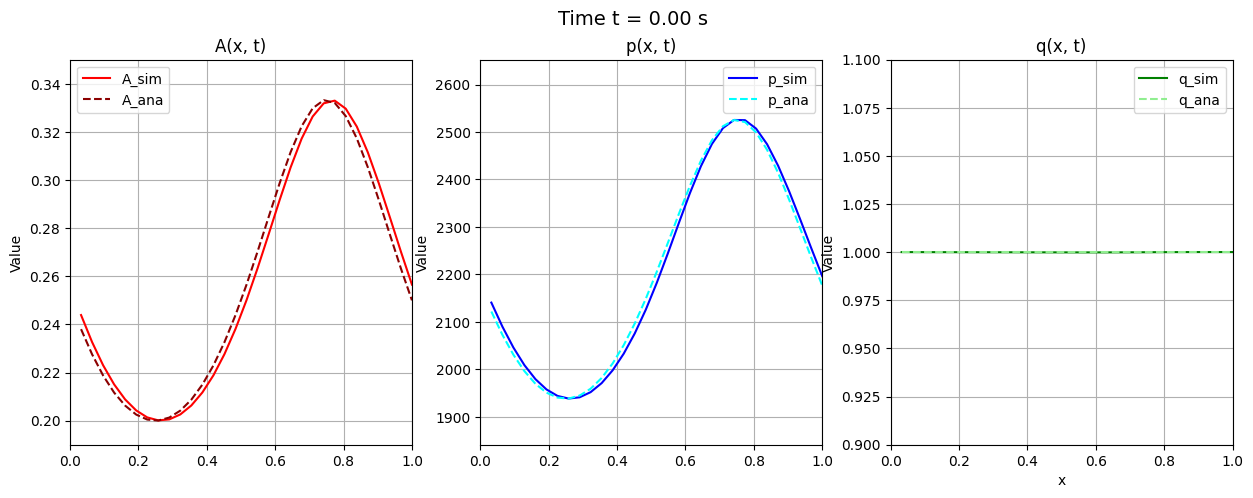

In [7]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

A_solutions = np.array(A_solutions)
p_solutions = np.array(p_solutions)
q_solutions = np.array(q_solutions)

# Constants and data
n_timesteps = len(A_solutions)
x = np.linspace(grid.x_dual_centers[1], L, len(A_solutions[0]), endpoint=True)

# Set up the figure
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
ax_A, ax_p, ax_q = axes

line_A_sim, = ax_A.plot([], [], color='red', label='A_sim')
line_A_ana, = ax_A.plot([], [], '--', color='darkred', label='A_ana')

line_p_sim, = ax_p.plot([], [], color='blue', label='p_sim')
line_p_ana, = ax_p.plot([], [], '--', color='cyan', label='p_ana')

line_q_sim, = ax_q.plot([], [], color='green', label='q_sim')
line_q_ana, = ax_q.plot([], [], '--', color='lightgreen', label='q_ana')

ax_A.set_title("A(x, t)")
ax_p.set_title("p(x, t)")
ax_q.set_title("q(x, t)")

ax_q.set_xlabel("x")
for ax in axes:
    ax.set_ylabel("Value")
    ax.set_xlim(0, 1)
    ax.grid(True)
    ax.legend()

t_max = tF

A_min, A_max = 1/5, 1/3
ax_A.set_ylim(A_min * 0.95, A_max * 1.05)
ax_A.set_ylim(A_min * 0.95, A_max * 1.05)

# p = pe + K * sqrt(A/A0) --> plug in min/max A
p_min = pe + Kref * (np.sqrt(A_min / A0ref)-1)
p_max = pe + Kref * (np.sqrt(A_max / A0ref)-1)
ax_p.set_ylim(p_min * 0.95, p_max * 1.05)
ax_p.set_ylim(p_min * 0.95, p_max * 1.05)

# q(x) = 1
ax_q.set_ylim(0.9, 1.1)
ax_q.set_ylim(0.9, 1.1)

# Analytical functions
def analytical_A(x):
    return 1 /(np.sin(2 * np.pi * x) + 4)

def analytical_p(A):
    return pe + Kref * (np.sqrt(A / A0ref)-1)

def analytical_q(x):
    return np.ones_like(x)

# Update function for animation
def update(frame):
    t = frame * dt
    A_sim = A_solutions[frame]
    p_sim = p_solutions[frame]
    q_sim = q_solutions[frame]

    A_ana = analytical_A(x)
    p_ana = analytical_p(A_ana)
    q_ana = analytical_q(x)

    line_A_sim.set_data(x, A_sim)
    line_A_ana.set_data(x, A_ana)

    line_p_sim.set_data(x, p_sim)
    line_p_ana.set_data(x, p_ana)

    line_q_sim.set_data(x, q_sim)
    line_q_ana.set_data(x, q_ana)

    fig.suptitle(f"Time t = {t:.2f} s", fontsize=14)
    return (line_A_sim, line_A_ana, line_p_sim, line_p_ana, line_q_sim, line_q_ana)

# Create animation
ani = FuncAnimation(fig, update, frames=int(n_timesteps/div), blit=True)
HTML(ani.to_jshtml())

[0.005    0.0025   0.00125  0.000625]
Running simulation for Np = 10


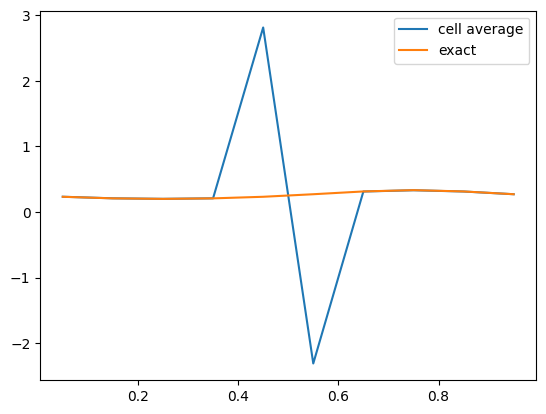

Forcing terms do not match expected values. Check implementation.
0.10284541968063898
0.01490160646656502
0.0  /  0.1  dt:  0.005  q_max:  1.0029126387534313  A_max:  0.33326874283503316  p_max:  2525.624532072822
0.005  /  0.1  dt:  0.005  q_max:  1.0055713142874274  A_max:  0.3330813888440079  p_max:  2524.8920259582933
0.01  /  0.1  dt:  0.005  q_max:  1.0080045043427277  A_max:  0.33278423509901095  p_max:  2523.7298083082665
0.015  /  0.1  dt:  0.005  q_max:  1.0100338670173272  A_max:  0.33239079261265353  p_max:  2522.190190762486
0.02  /  0.1  dt:  0.005  q_max:  1.0116214797783682  A_max:  0.3319152311523206  p_max:  2520.3280087403164
0.025  /  0.1  dt:  0.005  q_max:  1.0129182040233828  A_max:  0.3313720499324799  p_max:  2518.199411509933
0.030000000000000002  /  0.1  dt:  0.005  q_max:  1.014649124847128  A_max:  0.33077580730270145  p_max:  2515.860869781462
0.035  /  0.1  dt:  0.005  q_max:  1.0159979805809125  A_max:  0.330140900798952  p_max:  2513.368364969345
0.04  

In [8]:
dt = 5e-3
stretch = 1
Np_list = [10, 20, 40, 80]
# Np_list = [10, 20, 40, 80, 160]
# dt_list = [5e-3, 2.5e-3, 1.25e-3, 6.25e-4, 3.13e-4]
dt_list = dt/np.array([2**i for i in range( len(Np_list))])
print(dt_list)


L2_errors_q = []
L2_errors_A = []
L2_errors_p = []

def analytical_q(x_vals):
    q_vals = np.ones(len(x_vals))
    return q_vals

def analytical_A(x_vals):
    A_vals = 1/(np.sin(2*np.pi*x_vals)+4)
    return A_vals

def analytical_p(A_vals):
    p_vals = Kref*(np.sqrt(A_vals/A0ref)-1)
    return p_vals

# --- Convergence loop ---
for index, Np in enumerate(Np_list):
    print(f"Running simulation for Np = {Np}")
    grid = Grid1D(L=1.0, Np=Np, stretch_factor=1, stretch_type='uniform')
    blood_solution = BloodVessel1Dperiodic(grid = grid, flux_type='kolgan', tF = 0.1, dt =dt_list[index], rho=rho, Tau=0.0, A0=A0ref, K = Kref, BC_type = "test_stationary", cell_averages= True)
    q_solutions, A_solutions, p_solutions, q_star_solutions, q_starstar_solutions, u_solutions, t_sol = blood_solution.solve_blood_vessel()
    
    # Numerical solution at final time
    q_numerical = q_solutions[-1]
    A_numerical = A_solutions[-1]
    p_numerical = p_solutions[-1]
    
    x_vals = blood_solution.xc # Assuming your Grid1D has .x for grid points
    
    # Analytical solution at final time
    q_exact = analytical_q(x_vals)
    A_exact = analytical_A(x_vals)
    p_exact = analytical_p(A_exact)

    # L2 norm of the error (ignoring nan from root solver)
    mask = ~np.isnan(q_exact)
    L2_error_q = np.sqrt(np.mean((q_numerical[mask] - q_exact[mask])**2) )
    L2_errors_q.append(L2_error_q)
    
    mask = ~np.isnan(A_exact)
    L2_error_A = np.sqrt(np.mean((A_numerical[mask] - A_exact[mask])**2))
    L2_errors_A.append(L2_error_A)
    
    mask = ~np.isnan(q_exact)
    L2_error_p = np.sqrt(np.mean((p_numerical[mask] - p_exact[mask])**2) )
    L2_errors_p.append(L2_error_p)

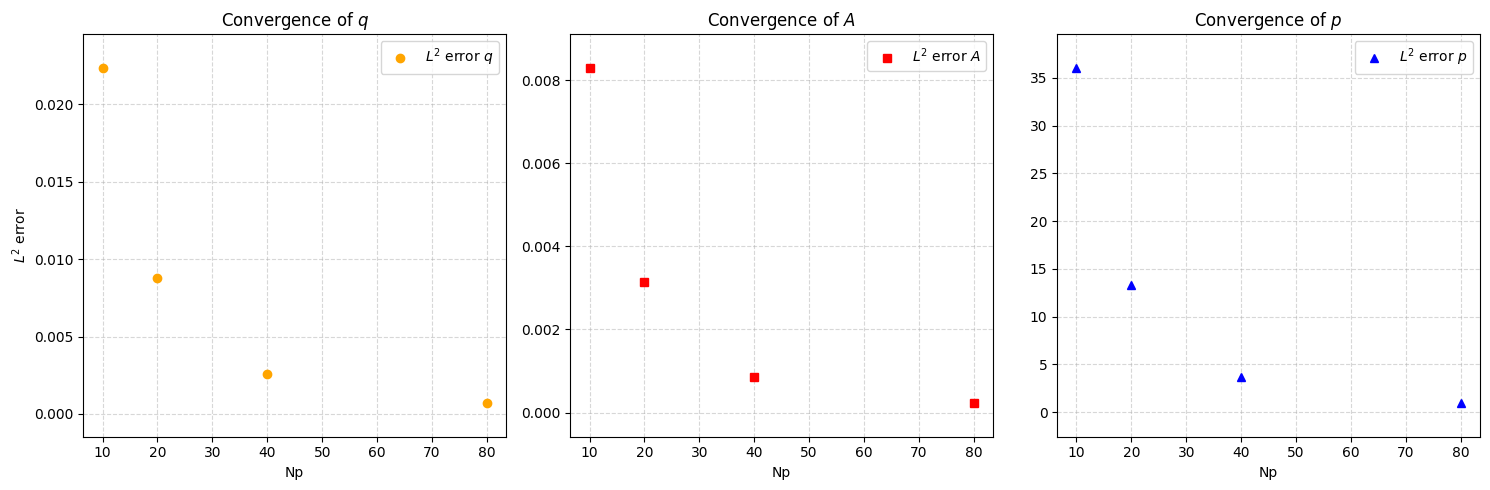

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # No sharey=True

def set_custom_ylim(ax, data, padding_ratio=0.1):
    """Set y-limits with padding based on data range."""
    y_min, y_max = np.min(data), np.max(data)
    padding = (y_max - y_min) * padding_ratio
    ax.set_ylim(y_min - padding, y_max + padding)

# Q plot
axes[0].plot(Np_list, L2_errors_q, 'o', label=r'$L^2$ error $q$', color="orange")
axes[0].set_title("Convergence of $q$")
axes[0].set_xlabel('Np')
axes[0].set_ylabel(r'$L^2$ error')
set_custom_ylim(axes[0], L2_errors_q)
axes[0].grid(True, which='both', ls='--', alpha=0.5)
axes[0].legend()

# A plot
axes[1].plot(Np_list, L2_errors_A, 's', label=r'$L^2$ error $A$', color="red")
axes[1].set_title("Convergence of $A$")
axes[1].set_xlabel('Np')
set_custom_ylim(axes[1], L2_errors_A)
axes[1].grid(True, which='both', ls='--', alpha=0.5)
axes[1].legend()

# P plot
axes[2].plot(Np_list, L2_errors_p, '^', label=r'$L^2$ error $p$', color="blue")
axes[2].set_title("Convergence of $p$")
axes[2].set_xlabel('Np')
set_custom_ylim(axes[2], L2_errors_p)
axes[2].grid(True, which='both', ls='--', alpha=0.5)
axes[2].legend()

plt.tight_layout()
plt.show()

In [10]:
log_Np = np.log10(Np_list[1:])

log_L2_q = np.log10(L2_errors_q[1:])
slope_q, int_q = np.polyfit(log_Np, log_L2_q, 1)
fit_line_q = 10**(int_q + slope_q * np.log10(Np_list))

log_L2_A = np.log10(L2_errors_A[1:])
slope_A, int_A = np.polyfit(log_Np, log_L2_A, 1)
fit_line_A = 10**(int_A + slope_A * np.log10(Np_list))

log_L2_p = np.log10(L2_errors_p[1:])
slope_p, int_p = np.polyfit(log_Np, log_L2_p, 1)
fit_line_p = 10**(int_p+ slope_p * np.log10(Np_list))

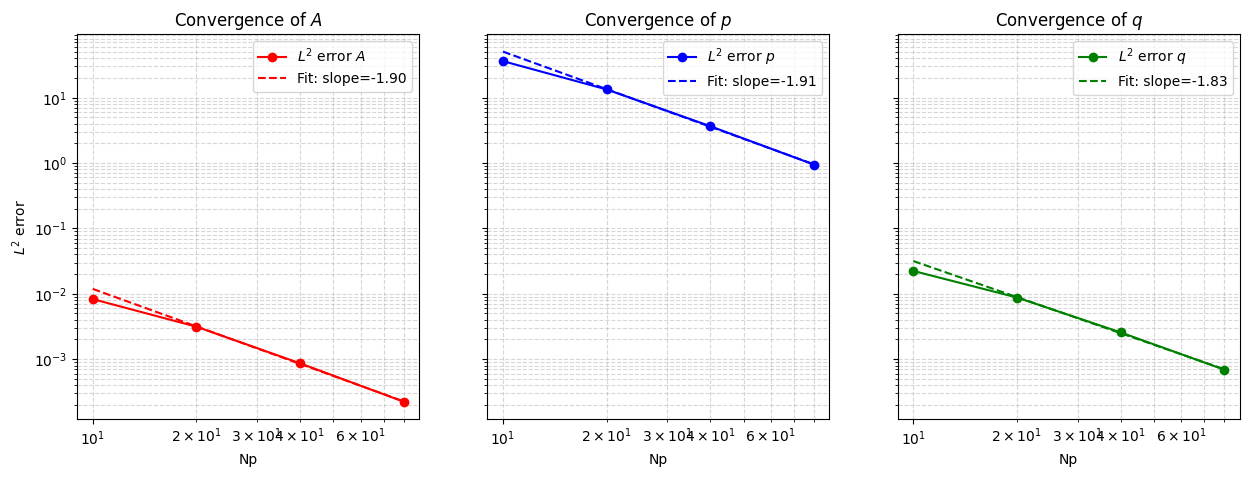

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Q plot
axes[2].loglog(Np_list, L2_errors_q, 'o-', label=r'$L^2$ error $q$', color="green")
axes[2].loglog(Np_list, fit_line_q, '--', label=f'Fit: slope={slope_q:.2f}', color="green")
axes[2].set_title("Convergence of $q$")
axes[2].set_xlabel('Np')
axes[0].set_ylabel(r'$L^2$ error')
axes[2].grid(True, which='both', ls='--', alpha=0.5)
axes[2].legend()

# A plot
axes[0].loglog(Np_list, L2_errors_A, 'o-', label=r'$L^2$ error $A$', color="red")
axes[0].loglog(Np_list, fit_line_A, '--', label=f'Fit: slope={slope_A:.2f}', color="red")
axes[0].set_title("Convergence of $A$")
axes[0].set_xlabel('Np')
axes[0].grid(True, which='both', ls='--', alpha=0.5)
axes[0].legend()

# P plot
axes[1].loglog(Np_list, L2_errors_p, 'o-', label=r'$L^2$ error $p$', color="blue")
axes[1].loglog(Np_list, fit_line_p, '--', label=f'Fit: slope={slope_p:.2f}', color="blue")
axes[1].set_title("Convergence of $p$")
axes[1].set_xlabel('Np')
axes[1].grid(True, which='both', ls='--', alpha=0.5)
axes[1].legend()

plt.show()